In [1]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('D:\Documents\Desktop\Code\CD\data_short.csv')
df.head(5)

,Date,Open,High,Low,Close,VOLUME
0,12/10/2015,605.87,612.48,605.29,609.55,78250610
1,13/10/2015,608.06,608.94,605.38,607.03,51939585
2,14/10/2015,610.78,612.59,607.57,607.57,43559160
3,15/10/2015,609.72,610.87,606.71,607.95,40856190
4,16/10/2015,609.76,616.35,609.73,609.73,52760860


In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [4]:
print(training_set.shape)

(800, 1)


In [5]:
print(test_set.shape)

(459, 1)


In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [8]:
print(X_train)

[[0.10138097 0.10482161 0.10909491 ... 0.07633816 0.08306232 0.08164836]
 [0.10482161 0.10909491 0.10742958 ... 0.08306232 0.08164836 0.07162495]
 [0.10909491 0.10742958 0.10749242 ... 0.08164836 0.07162495 0.06515216]
 ...
 [0.67521327 0.68047635 0.69791519 ... 0.59895367 0.59871801 0.60779878]
 [0.68047635 0.69791519 0.69742816 ... 0.59871801 0.60779878 0.60878855]
 [0.69791519 0.69742816 0.69745958 ... 0.60779878 0.60878855 0.58699785]]


In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [10]:
print(X_train.shape)

(740, 60, 1)


In [11]:
model = Sequential()
#First layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
#Second layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#Third layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#Fourth layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
#Output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0593
Epoch 2/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0101
Epoch 3/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0063
Epoch 4/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0056
Epoch 5/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0061
Epoch 6/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0047: 0s - loss: 0
Epoch 7/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0062
Epoch 8/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0047
Epoch 9/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0058
Epoch 10/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0045
Epoch 11/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0042
Epoch 12/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0043
Epoch 13/10

24/24 [==============================] - 1s 53ms/step - loss: 0.0016


In [13]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 519):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 50, 1)


In [14]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

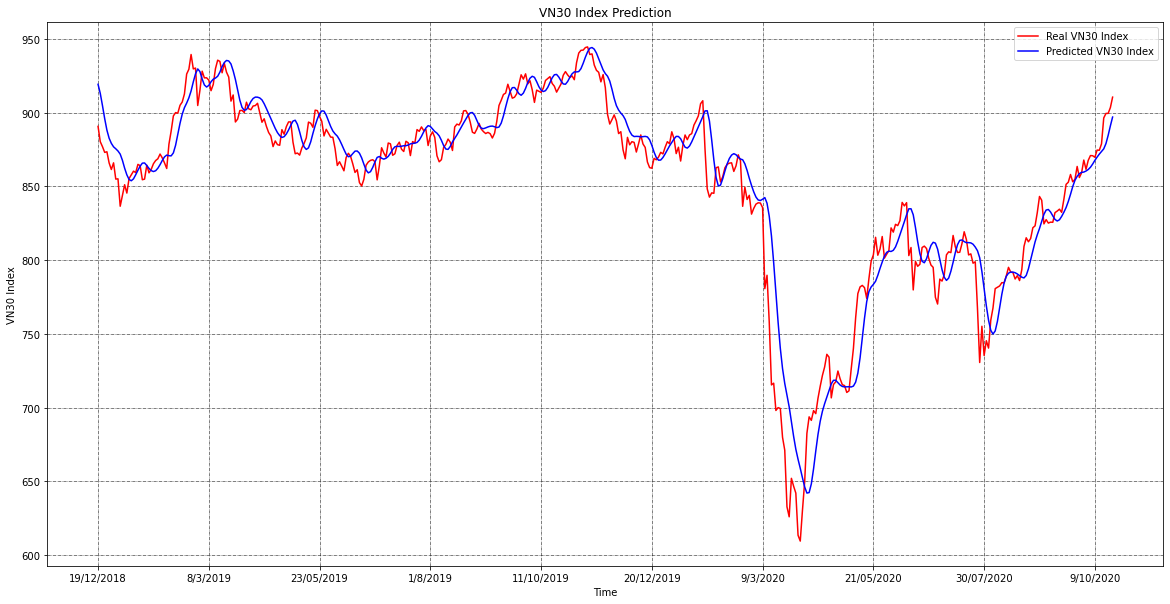

In [15]:
plt.figure(figsize =(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, 'r', label = 'Real VN30 Index')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, 'b', label = 'Predicted VN30 Index')
plt.xticks(np.arange(0,459,50))
plt.title('VN30 Index Prediction')
plt.xlabel('Time')
plt.ylabel('VN30 Index')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()